# 5. Machine Learning

In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


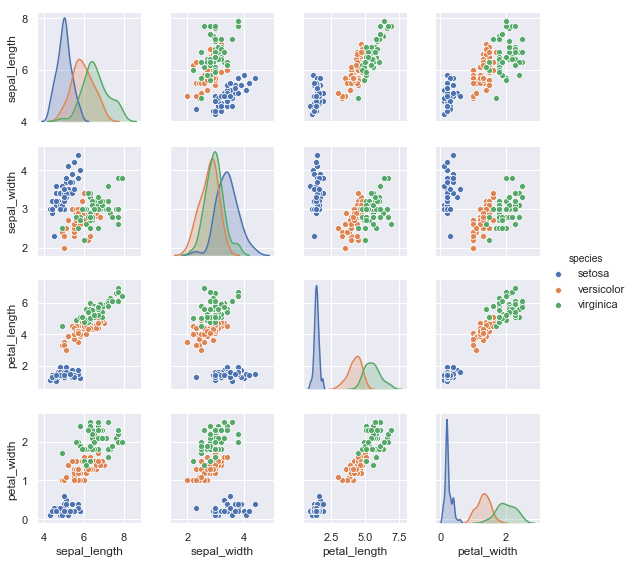

In [3]:
%matplotlib inline

sns.set()

sns.pairplot(iris, hue='species', size=2);

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

## SUPERVISED LEARNING EXAMPLE: SIMPLE LINEAR REGRESSION

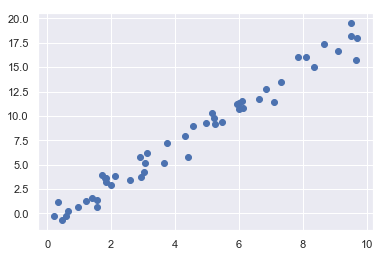

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

plt.scatter(x, y);

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
x.shape

(50,)

In [10]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [11]:
y.shape

(50,)

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
model.coef_

array([1.9776566])

In [14]:
model.intercept_

-0.9033107255311146

In [15]:
xfit = np.linspace(-1, 11)

In [16]:
Xfit = xfit[:, np.newaxis]

yfit = model.predict(Xfit)

In [18]:
yfit

array([-2.88096733, -2.39664326, -1.9123192 , -1.42799513, -0.94367106,
       -0.459347  ,  0.02497707,  0.50930113,  0.9936252 ,  1.47794926,
        1.96227333,  2.44659739,  2.93092146,  3.41524552,  3.89956959,
        4.38389366,  4.86821772,  5.35254179,  5.83686585,  6.32118992,
        6.80551398,  7.28983805,  7.77416211,  8.25848618,  8.74281024,
        9.22713431,  9.71145837, 10.19578244, 10.68010651, 11.16443057,
       11.64875464, 12.1330787 , 12.61740277, 13.10172683, 13.5860509 ,
       14.07037496, 14.55469903, 15.03902309, 15.52334716, 16.00767122,
       16.49199529, 16.97631936, 17.46064342, 17.94496749, 18.42929155,
       18.91361562, 19.39793968, 19.88226375, 20.36658781, 20.85091188])

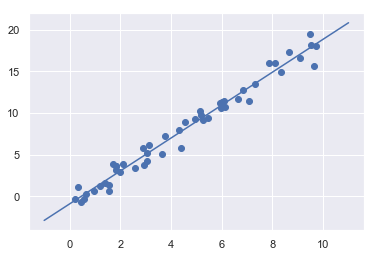

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## SUPERVISED LEARNING EXAMPLE: IRIS CLASSIFICATION

Gaussian naive Bayes is often a good model to use as a baseline classification

In [20]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [21]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class

model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data

y_model = model.predict(Xtest)             # 4. predict on new data

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

## UNSUPERVISED LEARNING EXAMPLE: IRIS DIMENSIONALITY

Recall that the Iris data is four dimensional: there are four features recorded for each sample.

In [23]:
from sklearn.decomposition import PCA  # 1. Choose the model class

model = PCA(n_components=2)      # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                # 3. Fit to data. Notice y is not specified!

X_2D = model.transform(X_iris)   # 4. Transform the data to two dimensions

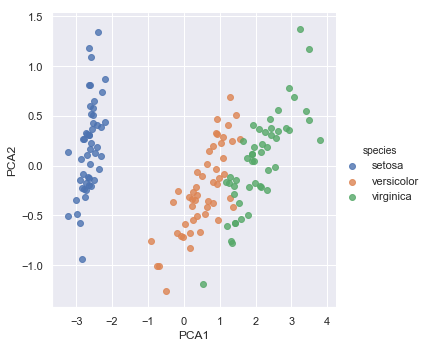

In [26]:
iris['PCA1'] = X_2D[:, 0]

iris['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

## UNSUPERVISED LEARNING: IRIS CLUSTERING

A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM)

In [28]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class

model = GaussianMixture(n_components=3, covariance_type='full')  # 2. Instantiate the model w/ hyperparameters

model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

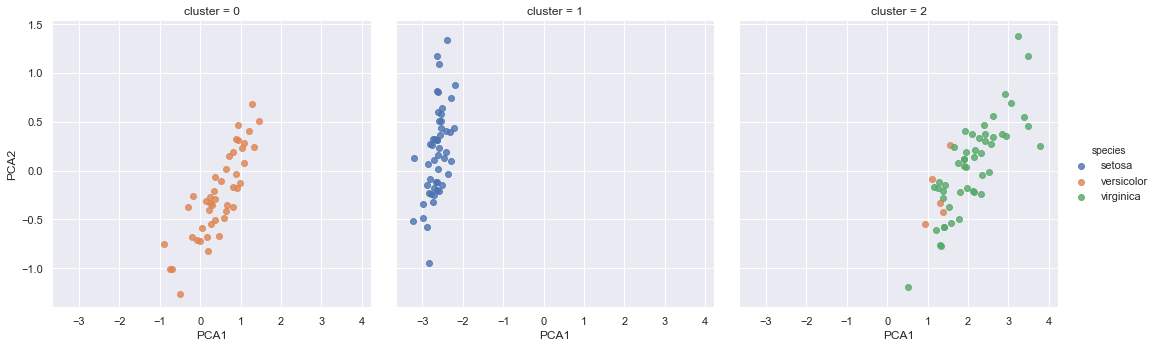

In [29]:
iris['cluster'] = y_gmm

sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

## Application: Exploring Handwritten Digits

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

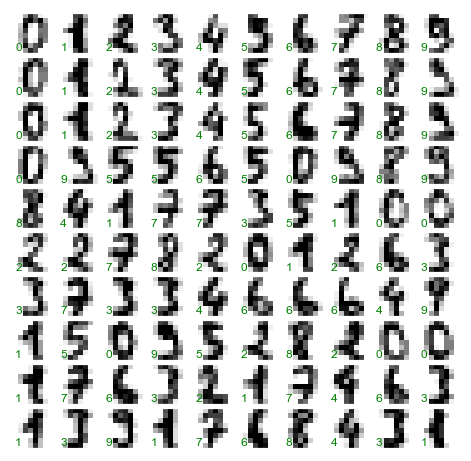

In [31]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                 subplot_kw={'xticks':[], 'yticks':[]},
                                 gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [37]:
X = digits.data
X.shape

(1797, 64)

In [38]:
y = digits.target
y.shape

(1797,)

### UNSUPERVISED LEARNING: DIMENSIONALITY REDUCTION

In [39]:
from IPython.display import clear_output
clear_output()

We’d like to visualize our points within the 64-dimensional parameter space, but it’s difficult to effectively visualize points in such a high-dimensional space. Instead we’ll reduce the dimensions to 2, using an unsupervised method

we’ll make use of a manifold learning algorithm called `Isomap`.

In [40]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)

data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional.

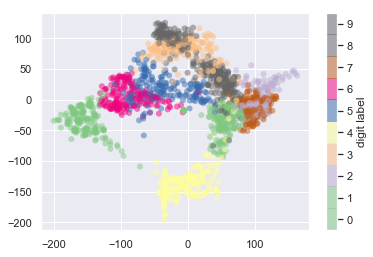

In [44]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', 
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### CLASSIFICATION ON DIGITS

In [49]:
X.shape

(1797, 64)

In [45]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [46]:
model = GaussianNB()
model.fit(Xtrain, ytrain)

y_model = model.predict(Xtest)

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.8333333333333334

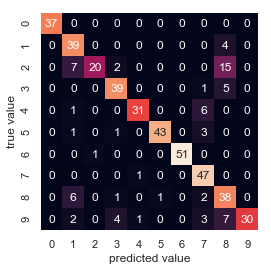

In [48]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [55]:
Xtest.shape

(450, 64)

In [53]:
ytest[:100]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8])

In [52]:
y_model[:100]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 3, 6, 7, 9, 0, 0, 5, 8, 6, 3, 0, 2, 3, 4, 1, 9,
       8, 6, 8, 8, 8, 3, 5, 1, 2, 1, 2, 1, 9, 7, 1, 3, 6, 0, 5, 3, 7, 5,
       1, 8, 9, 9, 3, 1, 7, 7, 4, 8, 5, 1])

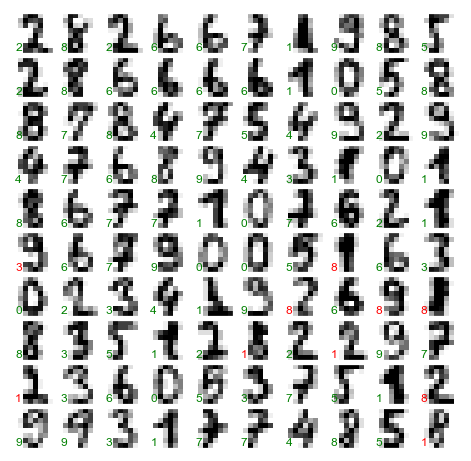

In [57]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                 subplot_kw={'xticks':[], 'yticks':[]},
                                 gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

## Hyperparameters and Model Validation

### MODEL VALIDATION THE WRONG WAY

In [59]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
# 150 rows
y = iris.target

In [60]:
from sklearn.neighbors import KNeighborsClassifier
# the label of an unknown point is the same as the label of its closest training point

model = KNeighborsClassifier(n_neighbors=1)

In [61]:
model.fit(X, y)

y_model = model.predict(X)

In [62]:
accuracy_score(y, y_model)

1.0

the nearest neighbor model is an instance-based estimator that simply stores the training data, and predicts labels by comparing new data to these stored points; except in contrived cases, it will get 100% accuracy every time!

### MODEL VALIDATION THE RIGHT WAY: HOLDOUT SETS

In [63]:
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9066666666666666

 The holdout set is similar to unknown data, because the model has not “seen” it before.

### MODEL VALIDATION VIA CROSS-VALIDATION

In [64]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [68]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

the extreme case in which our number of folds is equal to the number of data points; that is, we train on all points but one in each trial.

In [71]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [74]:
len(scores), X.shape

(150, (150, 4))

Because we have 150 samples, the leave-one-out cross-validation yields scores for 150 trials

### Selecting the Best Model

if our estimator is underperforming, how should we move forward? :

- Use a more complicated/more flexible model

- Use a less complicated/less flexible model

- Gather more training samples

- Gather more data to add features to each sample

### THE BIAS–VARIANCE TRADE-OFF

![](u-o.png)

The score here is the upper $R^2$ squared score, or coefficient of determination, which measures how well a model performs relative to a simple mean of the target values. upper $R^2=1$ indicates a perfect match, $R^2=0$ indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models.

- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.

- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

![](model.png)

### VALIDATION CURVES IN SCIKIT-LEARN

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    
    return make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression(**kwargs)
    )

In [77]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

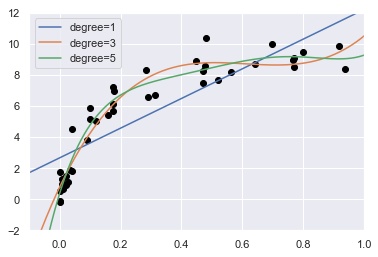

In [78]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')

axis = plt.axis()

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

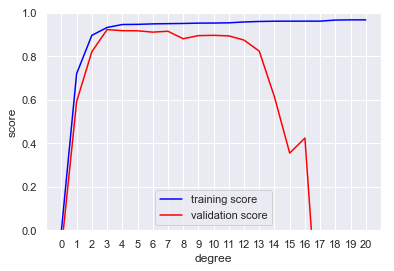

In [83]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xticks(np.arange(21))
plt.xlabel('degree')
plt.ylabel('score');

the optimal trade-off between bias and variance is found for a **third-order polynomial**

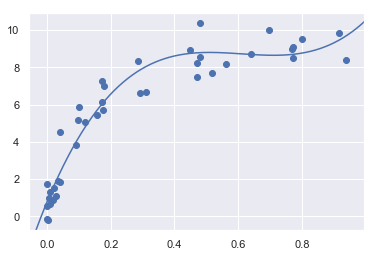

In [84]:
plt.scatter(X.ravel(), y)
lim = plt.axis()

y_test = PolynomialRegression(3).fit(X, y).predict(X_test)

plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Learning Curves

**One important aspect of model complexity is that the optimal model will generally depend on the size of your training data.**

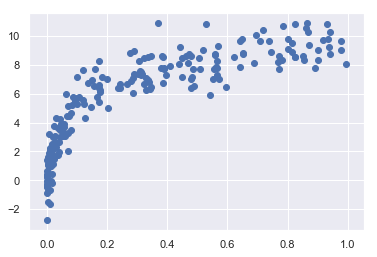

In [85]:
X2, y2 = make_data(200)

plt.scatter(X2.ravel(), y2);

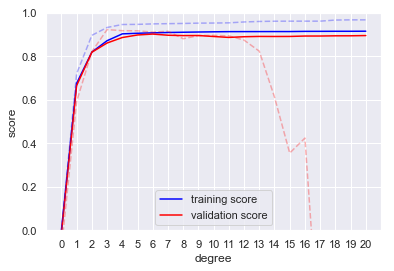

In [89]:
degree = np.arange(21)

train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')

plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')

plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xticks(np.arange(21))
plt.xlabel('degree')
plt.ylabel('score');

the peak here is probably around a degree of 6, but even a degree-20 model is not seriously overfitting the data—the validation and training scores remain very close.

![](learning-curve.png)

In [92]:
train_score

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.72060505, 0.73235327, 0.71615237, 0.75517775, 0.6979951 ,
        0.74351307, 0.71104367],
       [0.8966661 , 0.89427274, 0.88460403, 0.90482859, 0.87685741,
        0.90106431, 0.90420325],
       [0.92830604, 0.93586649, 0.93273606, 0.95501615, 0.91919623,
        0.92673491, 0.9402878 ],
       [0.9386132 , 0.94947024, 0.94775706, 0.9632512 , 0.93425141,
        0.94148127, 0.94641559],
       [0.94121068, 0.94988755, 0.94891078, 0.9637873 , 0.93481636,
        0.94464031, 0.94706837],
       [0.94280027, 0.95011515, 0.95028793, 0.96555698, 0.93622172,
        0.94504929, 0.94928043],
       [0.94465044, 0.95166164, 0.95034312, 0.96584535, 0.93731514,
        0.94571392, 0.95274503],
       [0.94465097, 0.95169173, 0.95126473, 0.96709791, 0.93735454,
        0.9484231 , 0.95274521],
       [0.94935834, 0.9537075 , 0.95317786, 0.96799601, 0.93964532,
        0.9490145 , 0.9

In [93]:
np.median(train_score, 1)

array([0.        , 0.72060505, 0.8966661 , 0.93273606, 0.94641559,
       0.94706837, 0.94928043, 0.95034312, 0.95126473, 0.9527462 ,
       0.95316414, 0.95410179, 0.95812976, 0.9604493 , 0.96155007,
       0.9618062 , 0.96182215, 0.96184623, 0.96687065, 0.9678403 ,
       0.96779042])

A plot of the training/validation score with respect to the size of the training set is known as a learning curve.

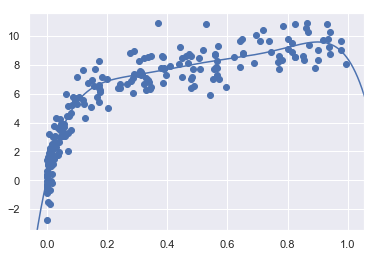

In [94]:
plt.scatter(X2.ravel(), y2)

lim = plt.axis()

y_test2 = PolynomialRegression(6).fit(X2, y2).predict(X_test)

plt.plot(X_test.ravel(), y_test2);
plt.axis(lim);


 In particular, once you have enough points that a particular model has converged, adding more training data will not help you! The only way to increase model performance in this case is to use another (often more complex) model.

### LEARNING CURVES IN SCIKIT-LEARN

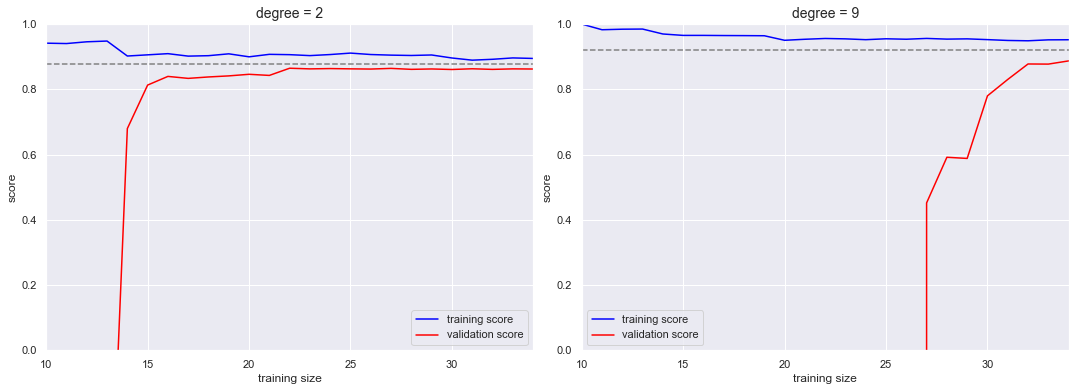

In [97]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, 
                                         cv=7,  # 7 times cross validations
                                         train_sizes=np.linspace(0.3, 1, 25)) # 25 times 

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', inestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

 In particular, when your learning curve has already converged (i.e., when the training and validation curves are already close to each other), __adding more training data will not significantly improve the fit__!

The only way to increase the converged score is to use a different (usually more complicated) model. We see this in the right panel

In [100]:
np.linspace(0.3, 1, 25).shape

(25,)

In [101]:
N.shape

(25,)

In [102]:
train_lc.shape

(25, 7)

In [103]:
train_lc[:2]

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.99818733, 0.98729796, 0.97865132, 0.97865132, 0.97865132,
        0.97865132, 0.97865132]])

### Validation in Practice: Grid Search

In [106]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [107]:
X.shape

(40, 1)

In [108]:
grid.fit(X, y);

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [109]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

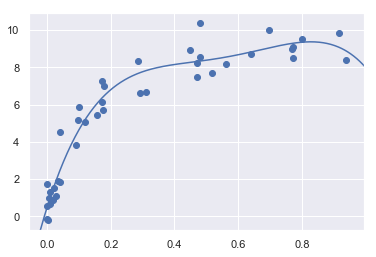

In [111]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)

lim = plt.axis()

y_test = model.fit(X, y).predict(X_test)

plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

the use of a validation set or cross-validation approach is vital when tuning parameters in order to avoid overfitting for more complex/flexible models.

## Feature Engineering

### Categorical Features

In [112]:
data = [
           {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
           {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
           {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
           {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
       ]

In [113]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int64)

In [114]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [115]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

`sklearn.preprocessing.OneHotEncoder` and `sklearn.feature_extraction.FeatureHasher` are two additional tools that Scikit-Learn includes to support this type of encoding

### Text Features

In [116]:
sample = ['problem of evil',
                 'evil queen',
                 'horizon problem']

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [118]:
X.toarray()

array([[1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0]], dtype=int64)

In [120]:
import pandas as pd

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


_frequency–inverse document frequency_ (TF–IDF), which weights the word counts by a measure of how often they appear in the documents. 

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Image Features

See above approach, we take the digit images when simply using the pixel values themselves.

### Derived Features

We saw that we could convert a linear regression into a polynomial regression not by changing the model, but by transforming the input!

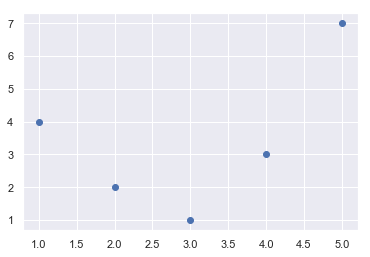

In [124]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

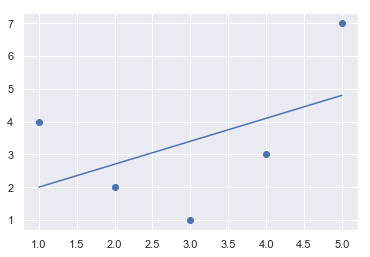

In [125]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]

model = LinearRegression().fit(X, y)
yfit = model.predict(X)

plt.scatter(x, y)
plt.plot(x, yfit);

It’s clear that we need a more sophisticated model to describe the relationship between x and y.

In [126]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

one column representing x, and a second column representing $x^2$, and a third column representing $x^3$

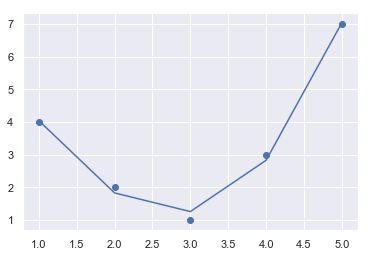

In [127]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)

plt.scatter(x, y)
plt.plot(x, yfit);

this is one motivational path to the powerful set of techniques known as _kernel methods_

### Imputation of Missing Data

In [129]:
X = np.array([[ np.nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   np.nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [131]:
from sklearn.preprocessing import Imputer

imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [132]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### Feature Pipelines

In [133]:
model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [134]:
model.fit(X, y)  # X with missing values, from above

print(y)
model.predict(X)

[14 16 -1  8 -5]


array([14., 16., -1.,  8., -5.])

## In Depth: Naive Bayes Classification

if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data,

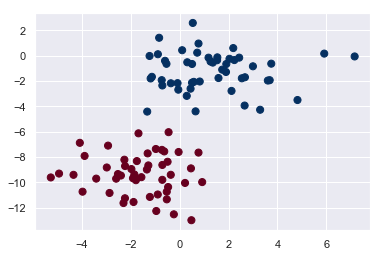

In [136]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

### Gaussian Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y);

In [138]:
rng = np.random.RandomState(0)

Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

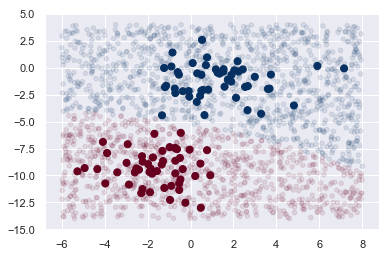

In [139]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis();

In [140]:
yprob = model.predict_proba(Xnew)

yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns give the posterior probabilities of the first and second label, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

### Multinomial Naive Bayes

multinomial naive Bayes is most appropriate for features that represent counts or count rates

#### EXAMPLE: CLASSIFYING TEXT

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.

In [142]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [143]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [145]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [151]:
train.target.shape

(2153,)

In [147]:
train.target[5]

3

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [152]:
model.fit(train.data, train.target)

labels = model.predict(test.data)

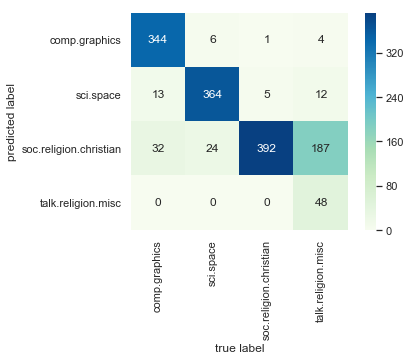

In [158]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
ax = sns.heatmap(mat.T, cmap=plt.cm.GnBu, square=True, annot=True, fmt='d', cbar=True, xticklabels=train.target_names, yticklabels=train.target_names)

ax.set_xlabel('true label')
ax.set_ylabel('predicted label');

In [159]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [160]:
predict_category('sending a payload to the ISS')

'sci.space'

In [161]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [162]:
predict_category('determining the screen resolution')

'comp.graphics'

simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

## In Depth: Linear Regression

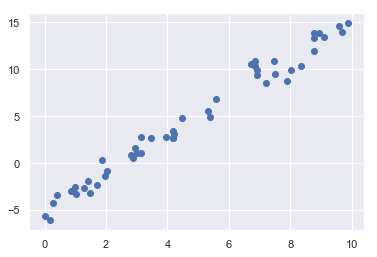

In [163]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

In [167]:
x.shape

(50,)

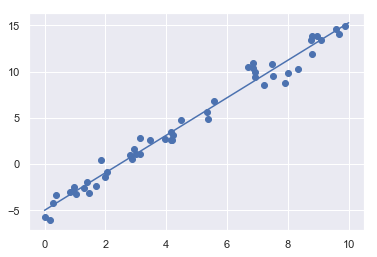

In [164]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [165]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


In [166]:
model.coef_

array([2.02720881])

In [168]:
rng = np.random.RandomState(1)

X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)

print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


### Basis Function Regression

In [169]:
x = np.array([2, 3, 4])

poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

##### ReShape

In [172]:
x.shape

(3,)

In [176]:
x.reshape(-1,1).shape

(3, 1)

In [173]:
x.reshape(-1,1)

array([[2],
       [3],
       [4]])

In [170]:
x[:, None].shape

(3, 1)

In [171]:
x[:, None]

array([[2],
       [3],
       [4]])

In [174]:
x[:, np.newaxis]

array([[2],
       [3],
       [4]])

In [175]:
x[:, np.newaxis].shape

(3, 1)

In [177]:
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

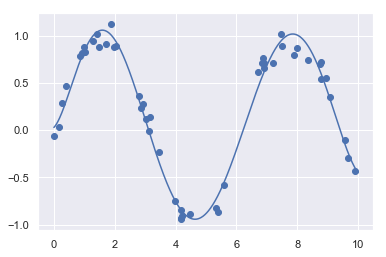

In [178]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

the use of 7th-order polynomial basis functions, can provide an excellent fit to this nonlinear data!

### GAUSSIAN BASIS FUNCTIONS

The Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer

In [180]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

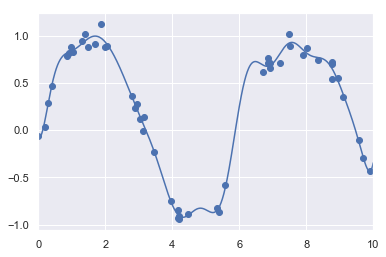

In [181]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)

yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

### Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to **overfitting**

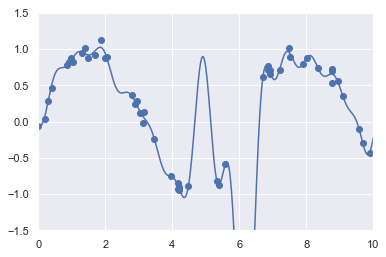

In [182]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())

model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

In [183]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    
    model.fit(x[:, np.newaxis], y)
    
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

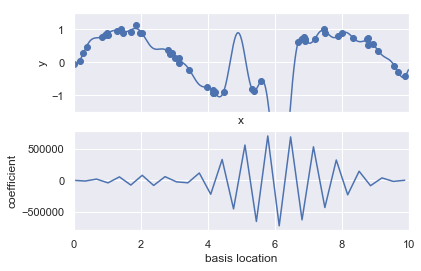

In [184]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

it would be nice if we could limit such spikes explicitly in the model by penalizing large values of the model parameters. Such a penalty is known as regularization, and comes in several forms.

### RIDGE REGRESSION (upper $L^2$ REGULARIZATION)

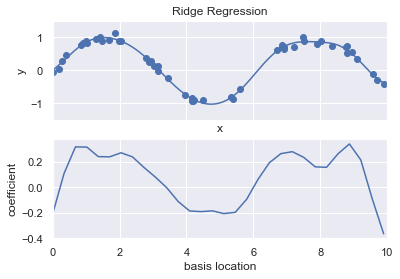

In [185]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

### LASSO REGULARIZATION $L^1$

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


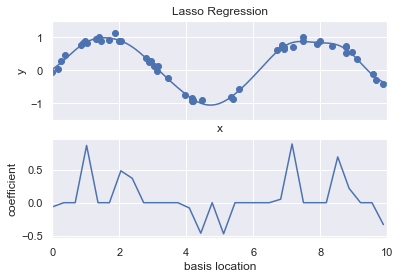

In [186]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

As with ridge regularization, the alpha parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation

## In-Depth: Support Vector Machines

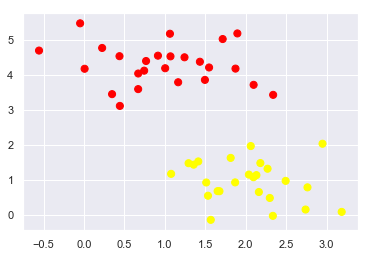

In [187]:
X, y = make_blobs(n_samples=50, centers=2,
                 random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

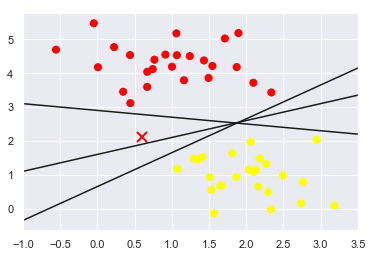

In [188]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Depending on which you choose, a new data point (e.g., the one marked by the “X” in the chart above) will be assigned a different label! Evidently our simple intuition of “drawing a line between classes” is not enough, and we need to think a bit deeper.

### Support Vector Machines: Maximizing the Margin

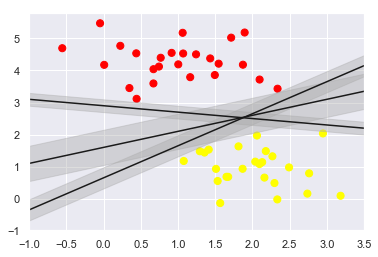

In [189]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Support vector machines are an example of such a _maximum margin estimator_

### FITTING A SUPPORT VECTOR MACHINE

In [190]:
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [198]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, 
                   facecolors='none', edgecolors='r');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

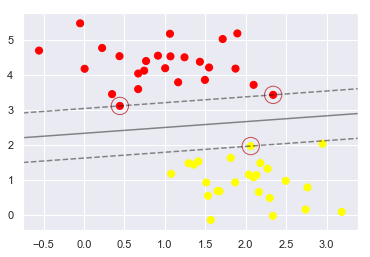

In [199]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plot_svc_decision_function(model);

In [193]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

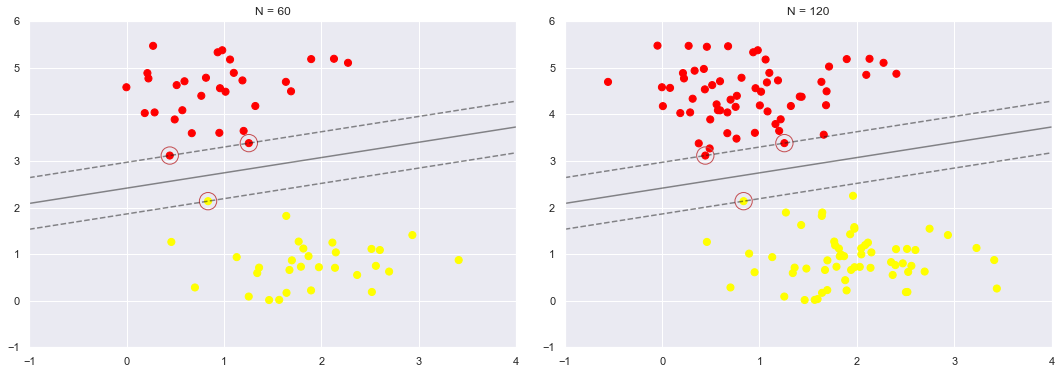

In [200]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [201]:
from ipywidgets import interact, fixed

interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

### BEYOND LINEAR BOUNDARIES: KERNEL SVM

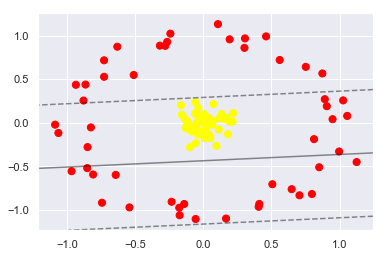

In [202]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

It is clear that no linear discrimination will ever be able to separate this data.

we might project the data into a higher dimension such that a linear separator would be sufficient.

In [203]:
r = np.exp(-(X ** 2).sum(1))

In [220]:
from mpl_toolkits import mplot3d

def plot_3D(elev=0, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    
    ax.view_init(elev, azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=np.arange(-90,90), azip=(-180, 180), X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=110, options=(-90, -89, -88, -87, -86, -85, -84, -83,…

the data becomes trivially linearly separable, by drawing a separating plane at, say, `r=0.7`

if we had not centered our radial basis function in **the right location**, we would not have seen such clean, linearly separable results. In general, the need to make such a choice is a problem

One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a kernel transformation, as _it is based on a similarity relationship (or kernel) between each pair of points._

we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter 

In [222]:
clf = SVC(kernel='rbf', C=1E6, gamma='scale')
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

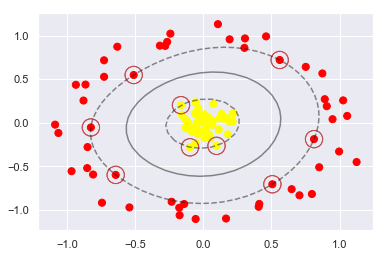

In [223]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plot_svc_decision_function(clf)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, 
            lw=1, 
            facecolors='none', 
            edgecolors='r');

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods

### TUNING THE SVM: SOFTENING MARGINS

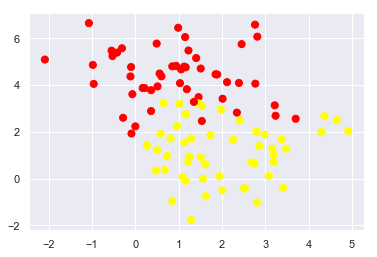

In [224]:
X, y = make_blobs(n_samples=100, centers=2,
                          random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

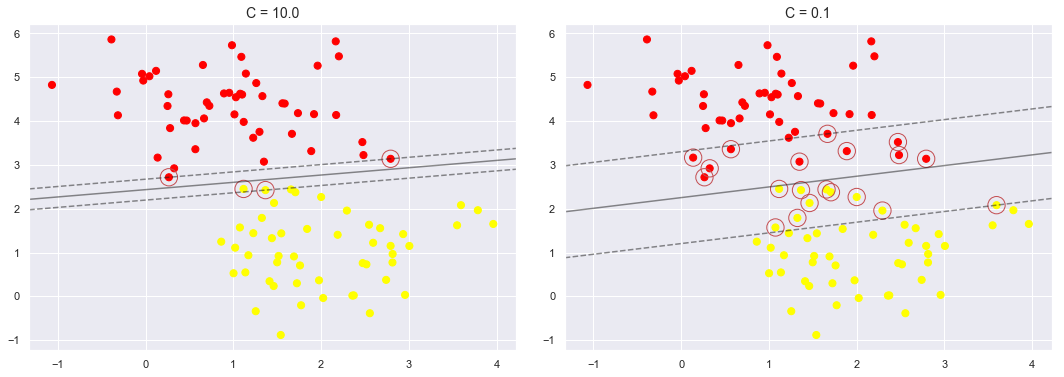

In [225]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    
    plot_svc_decision_function(model, axi)
    
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value of `C` parameter will depend on your dataset, and should be tuned via cross-validation

### Example: Face Recognition

In [226]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


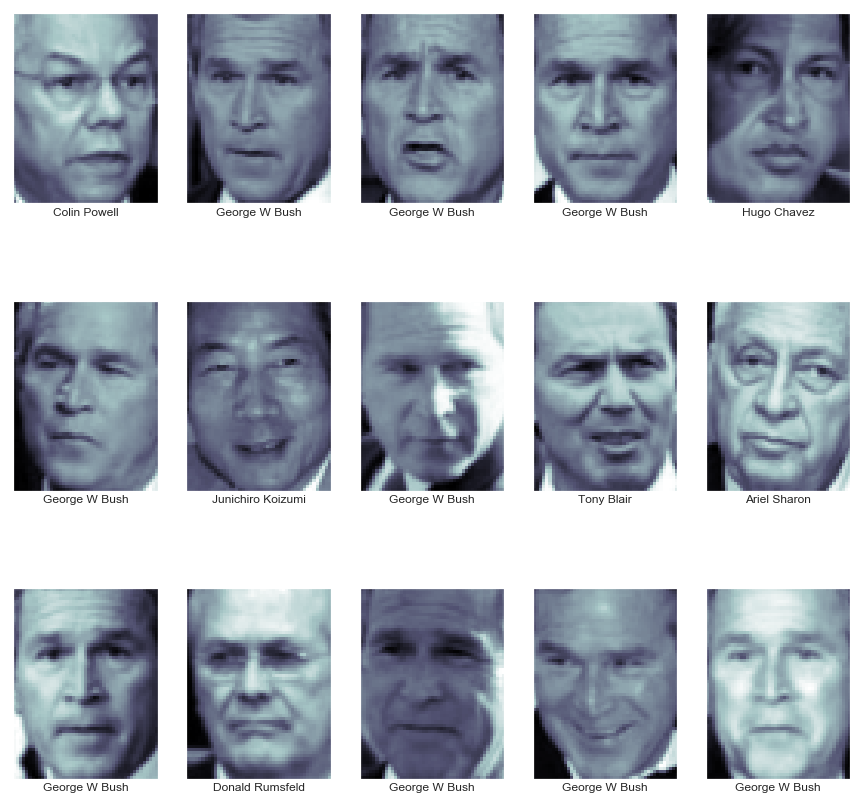

In [231]:
fig, ax = plt.subplots(3, 5, figsize=(15,15))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [233]:
# PCA & SVC
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42) # !!!!!!!!!!!
svc = SVC(kernel='rbf', class_weight='balanced') # ##########

model = make_pipeline(pca, svc)

In [234]:
faces.data.shape

(1348, 2914)

In [236]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [237]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]} # ɣ (gamma) is a parameter that controls the width of the Gaussian kernel

grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
grid.best_params_

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 50.8 s, sys: 2.77 s, total: 53.6 s
Wall time: 31.7 s


{'svc__C': 10, 'svc__gamma': 0.001}

In [238]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

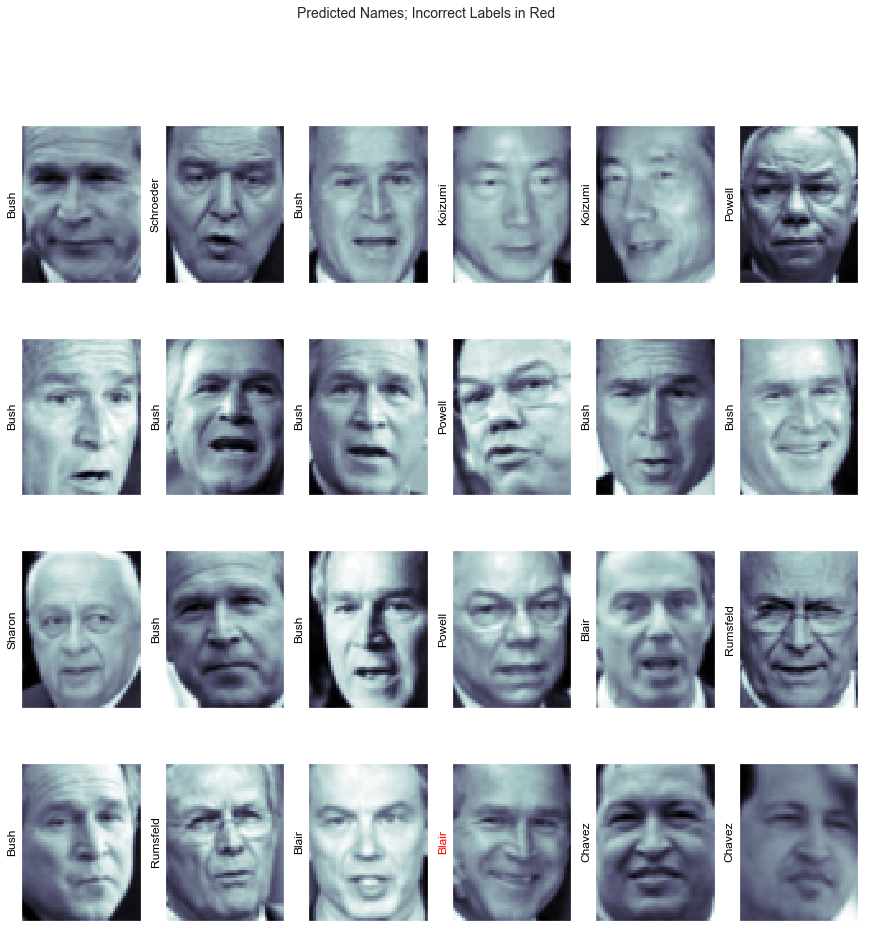

In [239]:
fig, ax = plt.subplots(4, 6, figsize=(15,15))

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [240]:
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



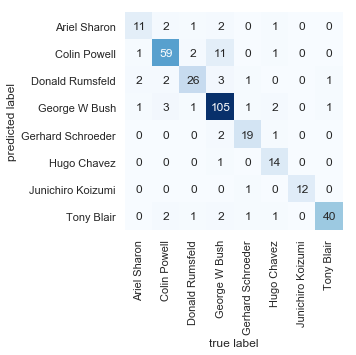

In [243]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');